# Phys 408 - Lab 1 - Michelson Interferometer
#### Jan Tache, Javier Velarde

## Objectives

- To observe and manipulate intereference patterns with different light sources
- To use the interfence patterns to determine information about the wavelengths in the light sources and the differences in the beam paths
- To use Fourier transform spectroscopy to determine the wavelengths in the different light sources

## Day 1 - 2019/01/16

Mount sodium lamp and white light lamp on a post with the double ended 90 degree offset clamp.

lower right knob is horizontal mirror alignment
upper left knob is vertical mirror alignment

Issues with APT User program
 - Would not display anything
 - Checked USB cable, connection was fine
 - Checked motor power - it was on
 - Rebooting the PC worked

Note: don't touch the table at all once MATLAB script is running. Any small movements will perturb the interferometer distances slightly. Even walking too strongly will do so.

Method to get close to ZPL:

1. Use a metre stick and place the mirror on the stage and the 2nd mirror at as close to equal distance from the beam splitter as possible.
    - Measure from the closest face of the beam splitter to the front of the mirror
1. Use HeNe laser to align mirrors initially
1. check that on the outer surface of the beam splitter cube, the two points from one of the split beams were on top of each other
    - Do this individually for each mirror
1. Then align a piece of paper with a hole in it such that one of the laser beams passes through the hole
1. Now put a piece of paper in front of the camera, and adjust the mirrors slightly until the light shows nice interference rings
1. Place the diffusing lens in front of the HeNe laser and align it so that the beam still passes through the hole in the paper.
1. Adjust the stage using the APT User program to get one large circle on the camera


Found somewhere close to ZPL at 1.4 unit on stage adjustment the program with HeNe laser.

![](images_2019-01-16/2018-01-16-zpl_with_hene.png)

After finding the ZPL, we switched to the sodium lamp:

1. turn off HeNe laser
1. swap the CCD filter to a camera lens
1. position the sodium lamp behind a light diffuser
1. turn on the sodium lamp - it takes a while to warm up and reach full intensity
1. adjust the aperture on the camera lens in order to be able to see the very faint interference pattern

Here is an example of an interference pattern that we found on the sodium lamp:

![](images_2018-01-16/2018-01-16-circles_moved_mirror_centre.png)

Here are some different fringe patterns

1 ![](images_2019-01-16/2018-01-16-circles_moved_mirror_centre.png)

After aligning with the HeNe laser, we adjusted the stage to get maximum visibility with the mirrors centered
    
    
2 ![](images_2019-01-16/2018-01-16-sodium-maybe-zpl.png)

To produce this one, we adjusted the stage slightly from the previous to get desctructive inteference in the middle. Since the inner circle is so large, we assume that this is close to the ZPL.
    
    
3 ![](images_2019-01-16/2018-01-16-vertical_not_centered.png)

To produce vertical lines, we moved one of the mirrors using the lower knob to reflect slightly to the right


4 ![](images_2019-01-16/2018-01-16-vertical_narrower.png)

To produce thinner vertical lines, we moved the mirror from before to reflect even further to the right


5 ![](images_2019-01-16/2018-01-16-narrower_off_centre.png)

to produce horizontal curved lines, we did a similar procedure to 3 and 4, but used the upper left knob to reflect the image upwards


6 ![](images_2019-01-16/2018-01-16-even-narrower_off_centre.png)

to produce narrower curved lines, we did a similar procedure to 3 and 4, but used the upper left knob to move the image even further upwards


7 ![](images_2019-01-16/2018-01-16-sodium_part_circle.png)

To produce diagonal curved lines, we combined movements of both knobs.

8 ![](images_2019-01-16/2018-01-16-sodium_zpl_maybe_v2.png)

To produce a barely visible fringe pattern, we moved the stage so that the beams  differed by many wavelengths.



## Day 2 - 2019/01/23

In [1]:
% compute expected # of fringes until 1/2 avg wavelength
lambda_1 = 588.995; % units: nm
lambda_2 = 589.592; % units: nm

avg_lambda = (lambda_1 + lambda_2)/4;
avg_half_lambda = avg_lambda/4;

n_wavelengths = avg_half_lambda / (lambda_2 - lambda_1)
distance = avg_lambda * n_wavelengths % units: nm

n_wavelengths =  123.39
distance =    3.6355e+04


The distance from maximum visibility to minimum visibility is 36 $\mu m$ - so we should make the stage travel at least 72 $\mu m$ to ensure we have sufficient information.

From looking at the data, it seems that it's pretty clear where the garbage data is located, so we can do it specifically on a file-by-file basis.

### Sodium coherence length and emission wavelengths
Below is the data processing for the sodium coherence length.

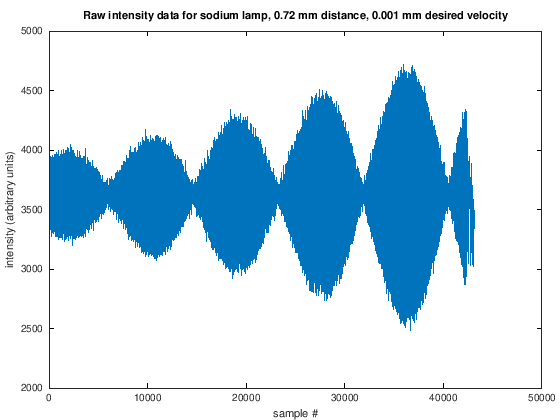

In [2]:
v_orig = csvread('test_data-2019-01-23/2019-01-23-sodium-coherence-0.72-0.001');

plot(v_orig)
title('Raw intensity data for sodium lamp, 0.72 mm distance, 0.001 mm desired velocity')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

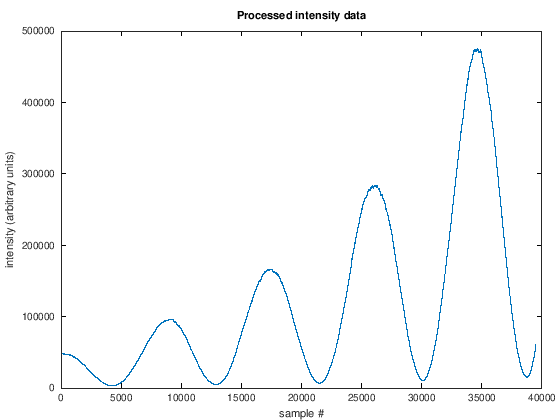

In [3]:
% truncate the data to keep the useful parts
v = v_orig(1000:42000);
% normalize the oscillations to be around 0
v = v - sum(v) / length(v);
% square the intensity
v = v.^2;

% smooth the data with a running average
v2 = [];
for i = 1:length(v)-1500
    v2(i) = sum(v(i:i+1499)) / 1500;
end

plot(v2)
title('Processed intensity data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

In [4]:
% find maxima in smoothed data

maxima_idx = [];
[_, i] = max(v2(8000:10000));
maxima_idx(end+1) = i + 8000 - 1;
[_, i] = max(v2(15000:18000));
maxima_idx(end+1) = i + 15000 - 1;
[_, i] = max(v2(24000:27000));
maxima_idx(end+1) = i + 24000 - 1;
[_, i] = max(v2(32000:35000));
maxima_idx(end+1) = i + 32000 - 1;

maxima_diffs = diff(maxima_idx)

% find minima in smoothed data

minima_idx = [];
[_, i] = min(v2(3000:5000));
minima_idx(end+1) = i + 3000 - 1;
[_, i] = min(v2(12000:14000));
minima_idx(end+1) = i + 12000 - 1;
[_, i] = min(v2(21000:24000));
minima_idx(end+1) = i + 21000 - 1;
[_, i] = min(v2(29000:31000));
minima_idx(end+1) = i + 29000 - 1;
[_, i] = min(v2(37000:39500));
minima_idx(end+1) = i + 37000 - 1;

minima_diffs = diff(minima_idx)

maxima_diffs =

   8324   8717   8519

minima_diffs =

   8644   8602   8648   8617



In [5]:
% Average sample diff
average_sample_diff = mean([maxima_diffs minima_diffs]);
stddev_avg_sample_diff = std([maxima_diffs minima_diffs]);

% Seconds elpased
average_seconds = average_sample_diff / 30
stddev_seconds = stddev_avg_sample_diff / 30

average_seconds =  286.05
stddev_seconds =  4.2727


Using the seconds we can determine the distance between the extremes with our stage calibration velocity.

This distance $D$ is equal to $N\lambda_1 = (N+1)\lambda_2$, where $\lambda_1, \lambda_2$ are the two emission wavelengths of the sodium lamp and $\lambda_1 > \lambda_2$

We can use this to determine the wavelength difference between the two emission wavelengths with the formula:

$$\Delta\lambda = \frac{\lambda_1\lambda_2}{D}$$

We know $\lambda_1$ and $\lambda_2$ are close to each other, so we can replace the product $\lambda_1\lambda_2$ with the square of their average: $\lambda^2$ to get:

$$\Delta\lambda = \frac{\lambda^2}{D}$$

### Stage velocity calibration

TODO: describe what we did in the experiment and what the goal was

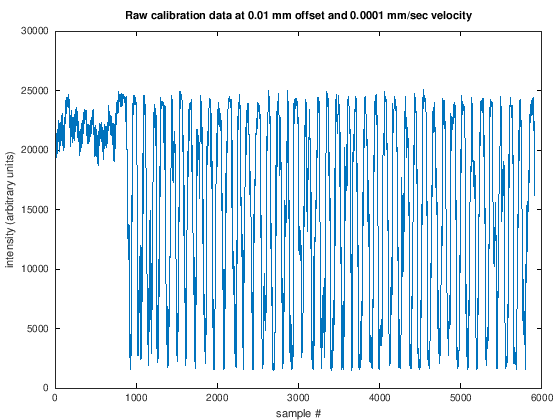

In [6]:
data_orig = csvread('test_data-2019-01-23/2019-01-23-HeNe-calib-0.01-0.0001');
plot(data_orig)
title('Raw calibration data at 0.01 mm offset and 0.0001 mm/sec velocity')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

It looks like decent data starts after about 1000 samples. So we'll use the number of samples between peaks starting from sample 1000 to know the actual velocity.

We'll use a peak-finding algorithm with hysteresis to compute the peaks.

average_width =  20


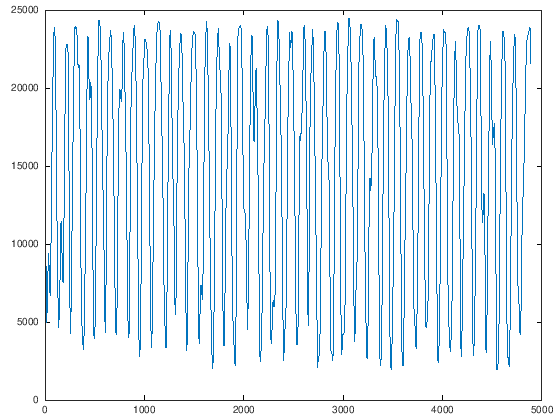

In [7]:
data = data_orig(1000:end);

average_width = 20
v2 = [];
for i = 1:length(data)-average_width
    v2(i) = sum(data(i:i+average_width-1)) / average_width;
end
plot(v2)

ans =

    1   40



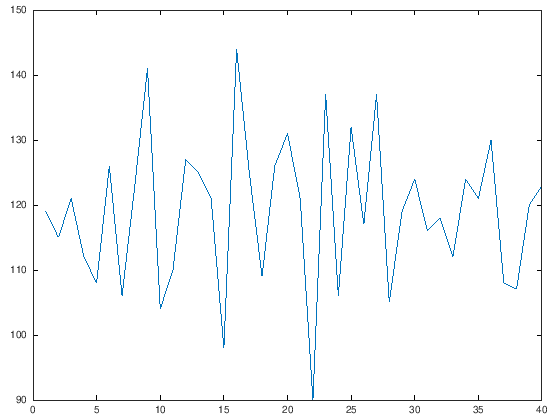

In [8]:
data = v2;

% return the distances between peaks with hysteresis to detect intervals of maxima
function sample_diffs = hysteresis_diffs(low, high, data)
    max_left_indices = [];
    max_right_indices = [];
    
    found_max = 0;
    for i=1:length(data)
        if (!found_max && data(i) > high)
            found_max = 1;
            max_left_indices(end+1) = i;
        elseif (found_max && data(i) < low)
            found_max = 0;
            max_right_indices(end+1) = i;
        end
    end
    if (found_max)
            max_right_indices(end+1) = length(data);
    end
    
    sample_diffs = [];
    [_, il] = max(max_left_indices(1):max_right_indices(1));
    for i=2:length(max_left_indices)
        [_, ir] = max(max_left_indices(i):max_right_indices(i));
        sample_diffs(end+1) = -(il + max_left_indices(i-1)) + (ir + max_left_indices(i));
        il = ir;
    end
end

diffs = hysteresis_diffs(6500, 19000, data);
size(diffs)
plot(diffs);

In [9]:
mean(diffs)
std(diffs)
velocity_nm_frame = 632.8 / mean(diffs)
velocity_nm_sec = velocity_nm_frame * 30

ans =  118.95
ans =  11.613
velocity_nm_frame =  5.3199
velocity_nm_sec =  159.60


So we have on average 119.0 frames between each maximum. This means that the velocity of the cart is about 5.3 nm/frame, or 160 nm/sec.

### Index of refraction of air

In this experiment we used the HeNe laser and passed one of the beams through a 10cm vacuum chamber. The beam passes through the vacuum chamber twice, and so has a total path length of 20cm inside the chamber. The path length difference in the glass of the vacuum chamber is not relevant to this experiment since it is kept constant throughout, and we don't need to be at the ZPL point.

We first evacuated the air from the chamber, started the vid_capture program and ran it for 2 minutes, then slowly leaked air back into the vacuum chamber. Based on prior reading, we  expect the index of refraction of air at STP to be about 1.00029. The number of expected fringes that should pass between a vacuum and having the chamber full of air again is computed below.

In [10]:
(1-1.00029^-1)*20*10^7/632.8

ans =  91.630


$$(1-1.00029^{-1}) * 20cm * 10^7 \frac{nm}{cm} \div 632.8 \frac{nm}{fringe} \approx 91.6 \textrm{ fringes}$$

#### Data processing

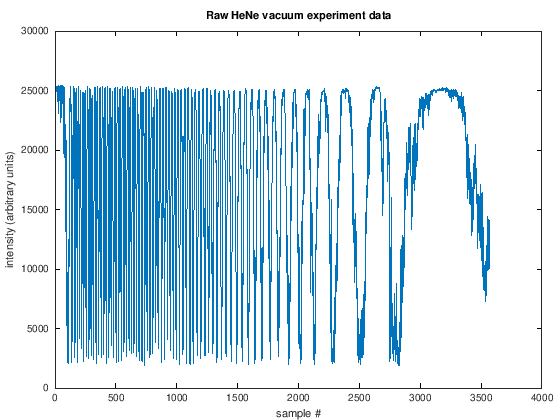

In [11]:
v = csvread('test_data-2019-01-23/HeNe-vacuum-120');
plot(v)
title('Raw HeNe vacuum experiment data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

Visually it looks like all of the peaks go above 20000 and all of the troughs go below 8000. So we'll try using the hysteresis based counter.

In [12]:
% count the peaks with hysteresis for counting the max and resetting
function count = hysteresis_count(low, high, data)
    count = 0;
    found_max = 0;
    for i=1:length(data)
        if (!found_max && data(i) > high)
            count++;
            found_max = 1;
        elseif (found_max && data(i) < low)
            found_max = 0;
        end
    end
end

count = hysteresis_count(8000, 20000, v)
% perturb hysteresis limits slightly to verify that the count is correct
if (hysteresis_count(6000, 22000, v) != count ||
    hysteresis_count(10000, 18000, v) != count)
    printf 'counts are not the same!!!\n';
else
    printf('counts seem to be consistent\n');
end

count =  70
counts seem to be consistent


In [13]:
n_fringe = 70;
format long g
idx = (1 - n_fringe * 632.8 / 10^7 / 20)^-1

idx =     1.00022152906426


We find a value for our index of refraction of air to be 1.00022,
which is in a similar order of magnitude, but the offset from 1 is -24% the value at STP.
We don't think this large of a difference can be explained by
the difference in the air conditions from STP. One of our initial guesses is that the pump
is unable to create a perfect vacuum. Also, it could be that the index of refraction in
air for shorter wavelengths is quite different from the value we found online.

We will try this experiment again next day.




